# **PRACTICA 2 - EJ.1**

**Limpiar un conjunto de datos reales, identificando valores faltantes, outliers, normalizando, estandarizando y codificando datos mediante herramientas como Python y Rapidminer.**

In [40]:
import pandas as pd
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
from scipy.stats import zscore
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

**Cargar archivo y Mostrar las primeras filas**

In [2]:
# Leer el archivo como texto plano
with open('ACT1_ESTUDIANTES_PORTUGUES.csv', encoding='utf-8-sig') as f:
    lines = f.readlines()

# Quitar comillas y dividir
data = [line.strip().replace('"', '').split(';') for line in lines]

# Convertir en DataFrame
import pandas as pd
df = pd.DataFrame(data[1:], columns=data[0])  # data[0] es la cabecera
df.head()

,escuela,sexo,edad,direccion,tam_fami,fam_estado,edu_madre,edu_padre,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,salud,ausencias,G1,G2,G3
0,GP,mujer,18,urbano,GT3,separados,4,4,at_home,teacher,...,muy buena,medio,alto,1,1,regular,4,0,11,11
1,GP,mujer,17,urbano,GT3,juntos,1,1,at_home,other,...,,medio,medio,1,1,regular,2,9,11,11
2,GP,mujer,15,urbano,LE3,juntos,1,1,at_home,other,...,muy buena,medio,poco,2,3,regular,6,12,13,12
3,GP,mujer,15,urbano,GT3,juntos,,2,health,services,...,buena,poco,poco,1,1,muy buena,0,14,14,14
4,GP,mujer,16,urbano,GT3,juntos,3,3,other,other,...,muy buena,medio,poco,1,2,muy buena,0,11,13,13


Información general de estructura

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   escuela         649 non-null    object
 1   sexo            649 non-null    object
 2   edad            649 non-null    object
 3   direccion       649 non-null    object
 4   tam_fami        649 non-null    object
 5   fam_estado      649 non-null    object
 6   edu_madre       649 non-null    object
 7   edu_padre       649 non-null    object
 8   Mjob            649 non-null    object
 9   Fjob            649 non-null    object
 10  razon           649 non-null    object
 11  tutor           649 non-null    object
 12  tiempo_viaje    649 non-null    object
 13  tiempo_estudio  649 non-null    object
 14  failures        649 non-null    object
 15  schoolsup       649 non-null    object
 16  famsup          649 non-null    object
 17  paid            649 non-null    object
 18  activities

 Estadísticas descriptivas para columnas numéricas

In [4]:
df.describe()

,escuela,sexo,edad,direccion,tam_fami,fam_estado,edu_madre,edu_padre,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,salud,ausencias,G1,G2,G3
count,649,649,649,649,649,649,649,649,649,649,...,649,649,649,649,649,649,649,649,649,649
unique,3,5,8,3,3,3,6,6,6,6,...,6,6,6,5,5,6,24,17,16,17
top,GP,mujer,17,urbano,GT3,juntos,2,2,other,other,...,muy buena,medio,medio,1,1,muy buena,0,10,11,11
freq,420,368,179,447,457,566,185,208,251,363,...,311,248,203,451,247,247,244,95,103,104


Ver nombres de columnas

In [5]:
print(df.columns.tolist())

['escuela', 'sexo', 'edad', 'direccion', 'tam_fami', 'fam_estado', 'edu_madre', 'edu_padre', 'Mjob', 'Fjob', 'razon', 'tutor', 'tiempo_viaje', 'tiempo_estudio', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'salud', 'ausencias', 'G1', 'G2', 'G3']


 Ver valores únicos por cada columna (opcional para exploración)

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

escuela: 3 valores únicos
sexo: 5 valores únicos
edad: 8 valores únicos
direccion: 3 valores únicos
tam_fami: 3 valores únicos
fam_estado: 3 valores únicos
edu_madre: 6 valores únicos
edu_padre: 6 valores únicos
Mjob: 6 valores únicos
Fjob: 6 valores únicos
razon: 5 valores únicos
tutor: 4 valores únicos
tiempo_viaje: 5 valores únicos
tiempo_estudio: 4 valores únicos
failures: 4 valores únicos
schoolsup: 2 valores únicos
famsup: 2 valores únicos
paid: 2 valores únicos
activities: 2 valores únicos
nursery: 2 valores únicos
higher: 2 valores únicos
internet: 2 valores únicos
romantic: 2 valores únicos
famrel: 6 valores únicos
freetime: 6 valores únicos
goout: 6 valores únicos
Dalc: 5 valores únicos
Walc: 5 valores únicos
salud: 6 valores únicos
ausencias: 24 valores únicos
G1: 17 valores únicos
G2: 16 valores únicos
G3: 17 valores únicos


In [67]:
resumen = pd.DataFrame({
    'Tipo de dato': df.dtypes,
    'Valores únicos': df.nunique(),
    'Valores nulos': df.isnull().sum(),
    'Valores no nulos': df.notnull().sum()
})
resumen

,Tipo de dato,Valores únicos,Valores nulos,Valores no nulos
escuela,object,3,0,649
sexo,object,5,0,649
edad,float64,8,0,649
direccion,object,3,0,649
tam_fami,object,3,0,649
fam_estado,object,3,0,649
edu_madre,object,6,0,649
edu_padre,object,6,0,649
Mjob,object,6,0,649
Fjob,object,6,0,649


Conteo de valores nulos por columna:

In [8]:
df.isnull().sum()

,0
escuela,0
sexo,0
edad,0
direccion,0
tam_fami,0
fam_estado,0
edu_madre,0
edu_padre,0
Mjob,0
Fjob,0


Total de valores nulos en todo el DataFrame:

In [9]:
df.isnull().sum().sum()

np.int64(0)

Distribución de valores categóricos

In [10]:
for col in df.select_dtypes(include='object'):
    print(f"Valores únicos de '{col}':")
    print(df[col].value_counts(), "\n")

Valores únicos de 'escuela':
escuela
GP    420
MS    226
        3
Name: count, dtype: int64 

Valores únicos de 'sexo':
sexo
mujer        368
hombre       256
femenino      14
masculino     10
               1
Name: count, dtype: int64 

Valores únicos de 'edad':
edad
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64 

Valores únicos de 'direccion':
direccion
urbano    447
rural     196
            6
Name: count, dtype: int64 

Valores únicos de 'tam_fami':
tam_fami
GT3    457
LE3    191
         1
Name: count, dtype: int64 

Valores únicos de 'fam_estado':
fam_estado
juntos       566
separados     79
               4
Name: count, dtype: int64 

Valores únicos de 'edu_madre':
edu_madre
2    185
4    172
1    140
3    138
       8
0      6
Name: count, dtype: int64 

Valores únicos de 'edu_padre':
edu_padre
2    208
1    174
3    131
4    128
0      7
       1
Name: count, dtype: int64 

Valores únicos de 'Mjob':
Mjob
other       

Forzar conversión de columnas clave a numéricas

In [11]:
cols_numericas = ['edad', 'tiempo_estudio', 'ausencias', 'G1', 'G2', 'G3']
for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Generar el mapa de calor

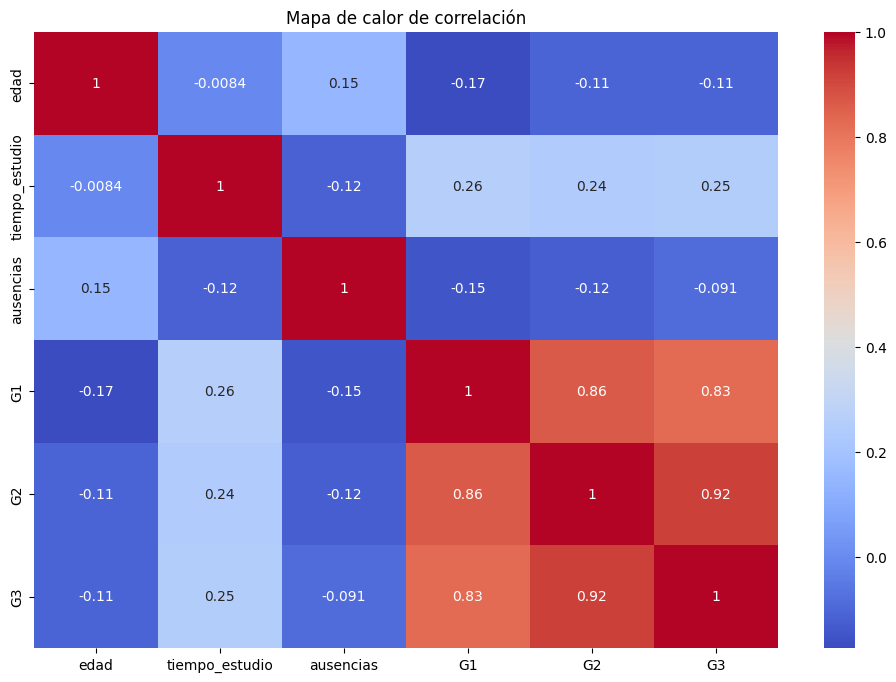

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df[cols_numericas].corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlación")
plt.show()

Visualización básica de una variable numérica

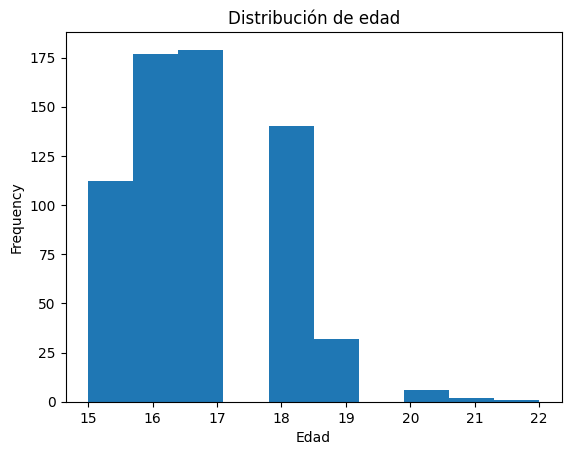

In [13]:
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')  # Asegurar que edad es numérica
df['edad'].plot.hist(bins=10, title='Distribución de edad')
plt.xlabel('Edad')
plt.show()

Detección de outliers

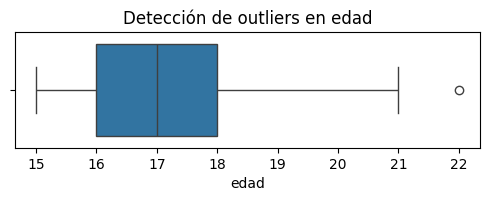

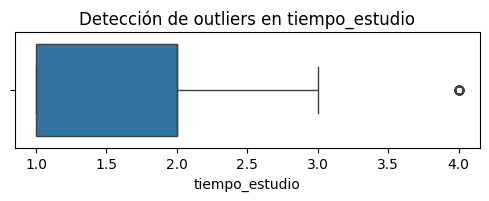

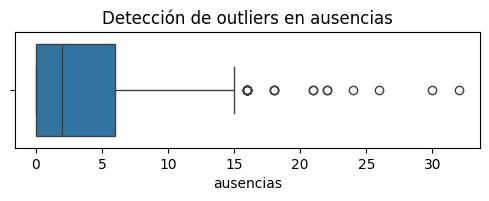

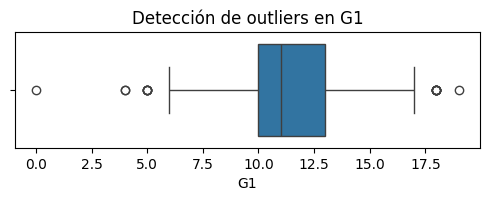

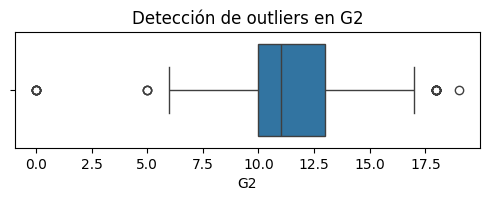

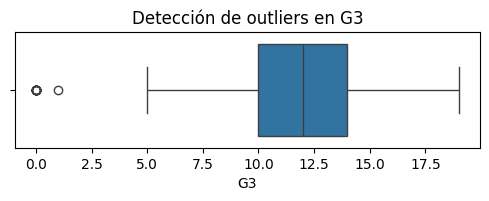

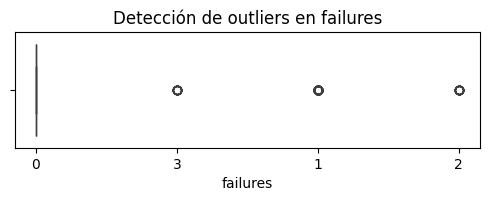

In [15]:
# Definir las columnas numéricas que se quieren analizar
columnas_numericas = ['edad', 'tiempo_estudio', 'ausencias', 'G1', 'G2', 'G3', 'failures']
# Graficar boxplots para detectar valores extremos
for col in columnas_numericas:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Detección de outliers en {col}')
    plt.show()

Tratamiento de valores faltantes

In [17]:
# Imputación simple de columnas numéricas con media
for col in columnas_numericas:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)
# Imputación simple de categóricas con moda
columnas_categoricas = df.select_dtypes(include='object').columns
for col in columnas_categoricas:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

Detección y corrección de datos erróneos

In [18]:
# Verificar valores únicos de sexo y trabajos de padres
print("Valores únicos en sexo:", df['sexo'].unique())
print("Valores únicos en Mjob:", df['Mjob'].unique())
print("Valores únicos en Fjob:", df['Fjob'].unique())
# Detectar algún valor incorrecto reemplazar:
df['sexo'] = df['sexo'].replace({'f': 'mujer', 'm': 'hombre'})

Valores únicos en sexo: ['mujer' 'hombre' 'masculino' 'femenino' '']
Valores únicos en Mjob: ['at_home' 'health' 'other' 'services' 'teacher' '']
Valores únicos en Fjob: ['teacher' 'other' 'services' 'health' '' 'at_home']


Normalización o estandarización (si aplicarás ML)

In [27]:
scaler = MinMaxScaler()
df[['edad', 'G1', 'G2', 'G3', 'ausencias']] = scaler.fit_transform(df[['edad', 'G1', 'G2', 'G3', 'ausencias']])

Z-Score (puntos a más de 3 desviaciones estándar)

In [43]:
# Asegurar que todas las columnas numéricas están en formato numérico
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [45]:
z_scores = df[columnas_numericas].apply(zscore)
outliers_z = (abs(z_scores) > 3)
print("Outliers detectados por Z-Score:")
print(outliers_z.sum())

Outliers detectados por Z-Score:
edad               3
G1                 1
G2                 7
G3                16
ausencias         11
failures          14
tiempo_estudio     0
dtype: int64


IQR (rango intercuartílico)

In [46]:
outliers_iqr = {}
for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outliers_iqr[col] = outliers.shape[0]
print("Outliers detectados por IQR:")
print(outliers_iqr)

Outliers detectados por IQR:
{'edad': 3, 'G1': 16, 'G2': 25, 'G3': 16, 'ausencias': 21, 'failures': 100, 'tiempo_estudio': 35}


Percentil extremo (por encima del 99% o debajo del 1%)

In [49]:
outliers_percentil = {}
for col in columnas_numericas:
    p01 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)
    outliers = df[(df[col] < p01) | (df[col] > p99)]
    outliers_percentil[col] = outliers.shape[0]
print("Outliers detectados por Percentiles (1% y 99%):")
for col, cantidad in outliers_percentil.items():
    print(f"{col}: {cantidad}")

Outliers detectados por Percentiles (1% y 99%):
edad: 3
G1: 4
G2: 8
G3: 2
ausencias: 6
failures: 0
tiempo_estudio: 0


In [ ]:
Detección con Isolation Forest

In [51]:
# Modelo
modelo = IsolationForest(contamination=0.05, random_state=42)
df['outlier_IF'] = modelo.fit_predict(df[columnas_numericas])
# -1 son outliers, 1 son normales
cantidad_outliers_iforest = (df['outlier_IF'] == -1).sum()
print("Outliers detectados por Isolation Forest:", cantidad_outliers_iforest)

Outliers detectados por Isolation Forest: 33


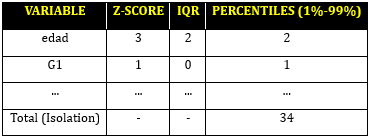

Gráfico de barras comparativo por técnica

In [55]:
# Crear tabla resumen con las 4 técnicas
resumen_outliers = pd.DataFrame({
    'Z-Score': outliers_z.sum(),
    'IQR': pd.Series(outliers_iqr),
    'Percentiles (1%-99%)': pd.Series(outliers_percentil)
})

# Agregar Isolation Forest como fila total
resumen_outliers.loc['Total (Isolation Forest)'] = [None, None, cantidad_outliers_iforest]

# Opcional: llenar NaN con '-'
resumen_outliers.fillna('-', inplace=True)

# Mostrar la tabla
resumen_outliers


,Z-Score,IQR,Percentiles (1%-99%)
edad,3.0,3.0,3.0
G1,1.0,16.0,4.0
G2,7.0,25.0,8.0
G3,16.0,16.0,2.0
ausencias,11.0,21.0,6.0
failures,14.0,100.0,0.0
tiempo_estudio,0.0,35.0,0.0
Total (Isolation Forest),-,-,33.0


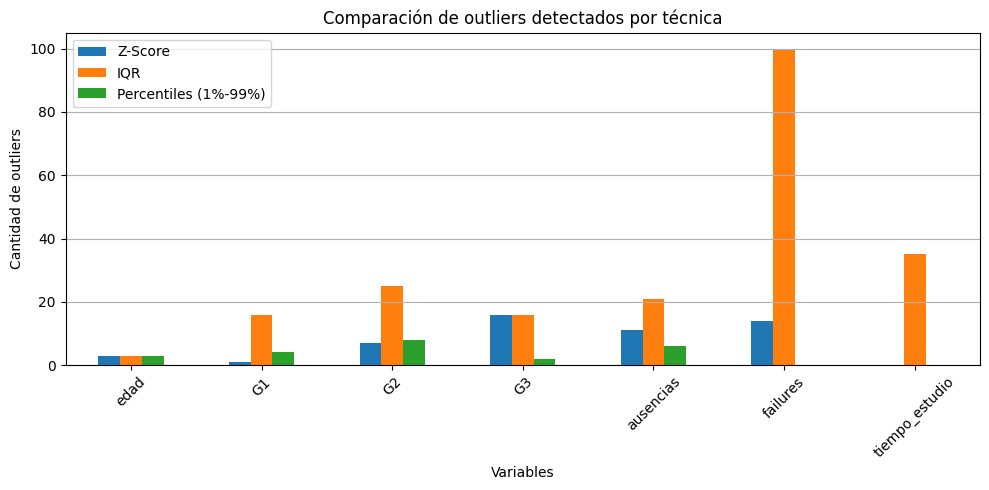

In [57]:
df_plot = resumen_outliers.drop(index='Total (Isolation Forest)')
# Crear gráfico de barras
df_plot.plot(kind='bar', figsize=(10, 5))
plt.title("Comparación de outliers detectados por técnica")
plt.xlabel("Variables")
plt.ylabel("Cantidad de outliers")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [63]:
# Crear copia numérica excluyendo la fila 'Total (Isolation Forest)'
resumen_numerico = resumen_outliers.drop(index='Total (Isolation Forest)').astype('float')
# Calcular totales por técnica
totales = {
    'Z-Score': resumen_numerico['Z-Score'].sum(),
    'IQR': resumen_numerico['IQR'].sum(),
    'Percentiles': resumen_numerico['Percentiles (1%-99%)'].sum(),
    'Isolation Forest': cantidad_outliers_iforest
}

Codificación de variables categóricas

In [62]:
# One-Hot Encoding para variables nominales
df_codificado = pd.get_dummies(df, columns=['sexo', 'escuela', 'Mjob', 'Fjob', 'internet', 'romantic'], drop_first=True)
df_codificado.head()

,edad,direccion,tam_fami,fam_estado,edu_madre,edu_padre,razon,tutor,tiempo_viaje,tiempo_estudio,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,internet_yes,romantic_yes
0,0.428571,urbano,GT3,separados,4,4,course,mother,15 a 30 min,2,...,False,False,False,False,False,False,False,True,False,False
1,0.285714,urbano,GT3,juntos,1,1,course,father,menos de 15min,2,...,False,False,False,False,False,True,False,False,True,False
2,0.000000,urbano,LE3,juntos,1,1,other,mother,menos de 15min,2,...,False,False,False,False,False,True,False,False,True,False
3,0.000000,urbano,GT3,juntos,,2,home,mother,menos de 15min,3,...,False,False,False,False,False,False,True,False,True,True
4,0.142857,urbano,GT3,juntos,3,3,home,father,menos de 15min,2,...,True,False,False,False,False,True,False,False,False,False


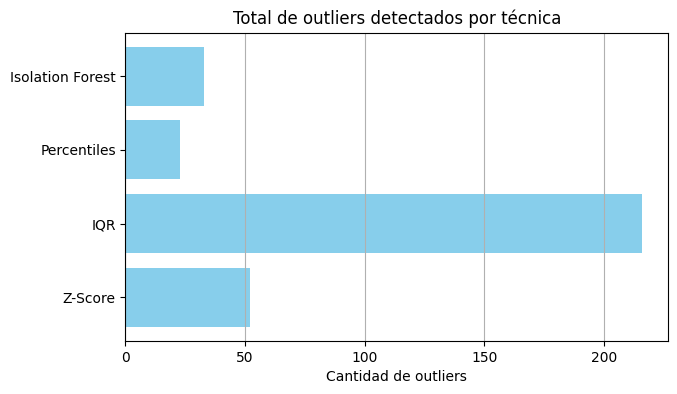

In [64]:
# Crear gráfico
plt.figure(figsize=(7, 4))
plt.barh(list(totales.keys()), list(totales.values()), color='skyblue')
plt.title("Total de outliers detectados por técnica")
plt.xlabel("Cantidad de outliers")
plt.grid(axis='x')
plt.show()

Verificación final

In [65]:
print("Verificación final de nulos:")
print(df_codificado.isnull().sum().sum())
print("Dimensiones finales del dataset:", df_codificado.shape)

Verificación final de nulos:
0
Dimensiones finales del dataset: (649, 46)


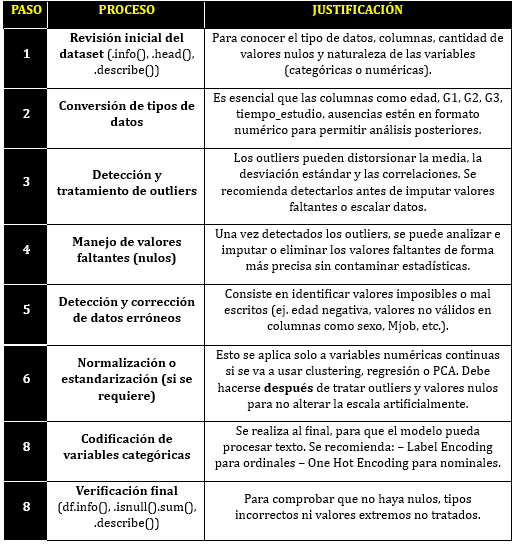

Validar que no hay valores fuera de rango

In [30]:
print("Edad fuera de rango:", df[(df['edad'] < 10) | (df['edad'] > 22)].shape[0])
print("Notas fuera de 0-20:", df[(df['G1'] > 20) | (df['G1'] < 0)].shape[0])
print("Ausencias negativas:", df[df['ausencias'] < 0].shape[0])

Edad fuera de rango: 649
Notas fuera de 0-20: 0
Ausencias negativas: 0


Confirmar que las columnas categóricas fueron codificadas

In [66]:
print("Columnas codificadas:")
print([col for col in df.columns if '_' in col or df[col].dtype == 'uint8'])

Columnas codificadas:
['tam_fami', 'fam_estado', 'edu_madre', 'edu_padre', 'tiempo_viaje', 'tiempo_estudio', 'outlier_IF']


Ver dimensiones y muestra final

In [36]:
print("Dimensiones del dataset final:", df.shape)
df.sample(5)

Dimensiones del dataset final: (649, 33)


,escuela,sexo,edad,direccion,tam_fami,fam_estado,edu_madre,edu_padre,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,salud,ausencias,G1,G2,G3
558,MS,hombre,0.285714,rural,GT3,juntos,2,2,other,other,...,excelente,muy alto,muy alto,3,5,muy buena,0.0000,0.421053,0.684211,0.526316
305,GP,hombre,0.285714,urbano,GT3,juntos,2,2,other,other,...,muy buena,alto,alto,2,3,buena,0.2500,0.421053,0.421053,0.473684
142,GP,hombre,0.428571,urbano,LE3,juntos,,1,services,services,...,buena,medio,alto,4,5,buena,0.0625,0.578947,0.578947,0.631579
437,MS,mujer,0.142857,rural,GT3,juntos,0,2,other,other,...,buena,poco,medio,1,2,mala,0.0000,0.631579,0.578947,0.631579
186,GP,hombre,0.285714,urbano,LE3,juntos,4,4,teacher,other,...,muy buena,alto,alto,1,3,muy buena,0.0000,0.578947,0.473684,0.526316
